In [1]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
import numpy as np
import cv2
import os
import glob
import scipy.linalg as la
import math

trainhuman=[]
trainhorse=[]
testhuman=[]
testhorse=[]

#importing the dataset
impath = 'train/humans'
data_path=os.path.join(impath,'*g')
files=glob.glob(data_path)
for image in files:
    I=cv2.imread(image)
    human_im=cv2.resize(I,(256, 256),interpolation = cv2.INTER_LINEAR)
    fd, human_hog_image = hog(human_im, orientations=9, pixels_per_cell=(16, 16),
                    cells_per_block=(16, 16), visualize=True, multichannel=True) 
    fd=np.reshape(fd,(2304,1))
    human_hog_image = human_hog_image.astype('uint8')
    trainhuman.append(fd)
trainhuman=np.asarray(trainhuman)   

impath = 'train/horses'
data_path=os.path.join(impath,'*g')
files=glob.glob(data_path)
for image in files:
    I=cv2.imread(image)
    horse_im=cv2.resize(I,(256, 256),interpolation = cv2.INTER_LINEAR)
    fd, horse_hog_image = hog(horse_im, orientations=9, pixels_per_cell=(16, 16),
                    cells_per_block=(16, 16), visualize=True, multichannel=True) 
    fd=np.reshape(fd,(2304,1))
    horse_hog_image = horse_hog_image.astype('uint8')
    trainhorse.append(fd)
trainhorse=np.asarray(trainhorse)

impath = 'test/humans'
data_path=os.path.join(impath,'*g')
files=glob.glob(data_path)
for image in files:
    I=cv2.imread(image)
    human_im=cv2.resize(I,(256, 256),interpolation = cv2.INTER_LINEAR)
    fd, human_hog_image = hog(human_im, orientations=9, pixels_per_cell=(16, 16),
                    cells_per_block=(16, 16), visualize=True, multichannel=True) 
    fd=np.reshape(fd,(2304,1))
    human_hog_image = human_hog_image.astype('uint8')
    testhuman.append(fd)
testhuman=np.asarray(testhuman)    

impath = 'test/horses'
data_path=os.path.join(impath,'*g')
files=glob.glob(data_path)
for image in files:
    I=cv2.imread(image)
    horse_im=cv2.resize(I,(256, 256),interpolation = cv2.INTER_LINEAR)
    fd, horse_hog_image = hog(horse_im, orientations=9, pixels_per_cell=(16, 16),
                    cells_per_block=(16, 16), visualize=True, multichannel=True) 
    fd=np.reshape(fd,(2304,1))
    horse_hog_image = horse_hog_image.astype('uint8')
    testhorse.append(fd)
testhorse=np.asarray(testhorse)

C:\Users\alfah\anaconda3\envs\mlip\lib\site-packages\ipykernel_launcher.py:24: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
C:\Users\alfah\anaconda3\envs\mlip\lib\site-packages\ipykernel_launcher.py:37: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
C:\Users\alfah\anaconda3\envs\mlip\lib\site-packages\ipykernel_launcher.py:50: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
C:\Users\alfah\anaconda3\envs\mlip\lib\site-packages\ipykernel_launcher.py:63: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.


Text(0.5, 1.0, 'HoG image of a horse')

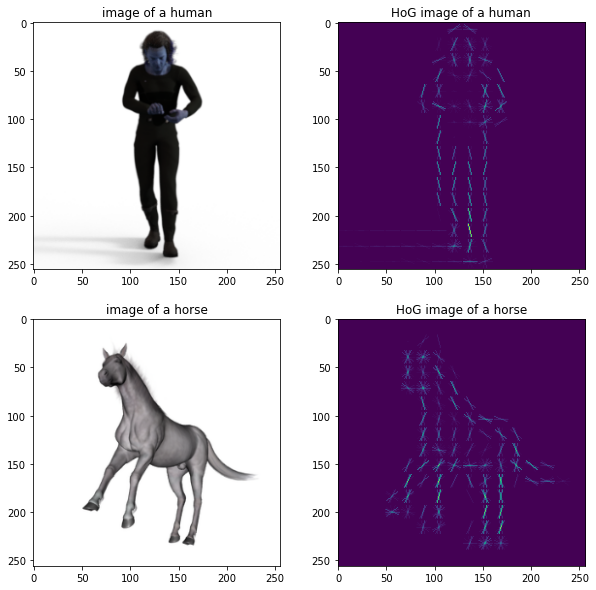

In [2]:
# Visualizing sample images and Histogram of Gradients
plt.figure(figsize=(10,10))
plt.subplot(221)
plt.imshow(human_im)
plt.title('image of a human')
plt.subplot(222)
plt.imshow(human_hog_image)
plt.title('HoG image of a human')
plt.subplot(223)
plt.imshow(horse_im)
plt.title('image of a horse')
plt.subplot(224)
plt.imshow(horse_hog_image)
plt.title('HoG image of a horse')

In [3]:
#defining the necessary functions 

X=np.concatenate((trainhuman,trainhorse),axis=0)
X=np.reshape(X,(1027,2304))
x1, x2 = np.reshape(trainhuman,(527,2304)), np.reshape(trainhorse,(500,2304))
def pca(X,x1,x2):
    s=1027*np.cov(X.T)
    evalues,evectors = la.eig(s)
    evalues = abs(evalues)
    evectors = abs(evectors)
    for i in range(0,2304):
        energy = np.sum(evalues[0:i+1])/np.sum(evalues)
        if energy>0.95:
            d=i+1
            break
    A = evectors[:,0:d]
    mean = np.mean(X,axis=0)
    mean = np.reshape(mean,(2304,1))
    #x_minus_mean = X.T - mean
    x1_minus_mean = x1.T - mean
    x2_minus_mean = x2.T - mean
    #Y_pca = np.matmul(A.T,x_minus_mean)
    Y1_pca = np.matmul(A.T,x1_minus_mean)
    Y2_pca = np.matmul(A.T,x2_minus_mean)
    return d, A, Y1_pca, Y2_pca


def fld(x1,x2,X):
    sigma1 = np.cov(x1.T)
    sigma2 = np.cov(x2.T)
    sigma_w = sigma1 + sigma2
    sigma_w_inv = la.inv(sigma_w)
    m1, m2 = np.mean(x1, axis =0), np.mean(x2, axis=0)
    m = m1 - m2
    W = np.matmul(sigma_w_inv,m)
    W = np.reshape(W,(2304,1))
    mean = np.mean(X,axis=0)
    mean = np.reshape(mean,(2304,1))
    #x_minus_mean = X.T - mean
    #x1_minus_mean = x1.T - mean
    #x2_minus_mean = x2.T - mean
    #Y_fld = np.matmul(W.T,x_minus_mean)
    Y1_fld = np.matmul(W.T,x1.T)
    Y2_fld = np.matmul(W.T,x2.T)
    return W, Y1_fld, Y2_fld

def gauss(x,Y1,Y2):# returns the class number which belongs to x
   
    if np.shape(Y1)[0]==1 and np.shape(Y2)[0]==1:
        
        sigma1, mean1 = np.std(Y1), np.mean(Y1)
        sigma2, mean2 = np.std(Y2), np.mean(Y2)
        const1 = 1/((2*math.pi)**0.5*sigma1)
        f1 = (-0.5)*(x-mean1)**2/(sigma1**2)
        g1 = const1*(f1)
        
        const2 = 1/((2*math.pi)**0.5*sigma2)
        f2 = (-0.5)*(x-mean2)**2/(sigma2**2)
        g2 = const2*(f2)
        
        if max(g1,g2) == g1:
            return 1
        else:
            return 2
        
    else:
        
        n = np.shape(Y1)[0]
        sigma1, sigma2 = np.cov(Y1), np.cov(Y2)
        mean1, mean2 = np.mean(Y1,axis=1), np.mean(Y2,axis=1)
        d1, d2 = 1, 1
        for i in range(0,n):
            d1, d2 = d1*sigma1[i,i], d2*sigma2[i,i]
        
        const1 = 1/((2*math.pi)**(n/2)*np.sqrt(d1))
        f1=(-0.5)*(np.matmul((x-mean1).T,np.matmul(np.linalg.inv(sigma1),(x-mean1))))
        g1 = const1*np.exp(f1)
        
        const2 = 1/((2*math.pi)**(n/2)*np.sqrt(d2))
        f2=(0.5)*(np.matmul((x-mean2).T,np.matmul(np.linalg.inv(sigma2),(x-mean2))))
        g2 = const2*np.exp(f2)
        
        if max(g1,g2) == g1:
            return 1
        else:
            return 2

#projecting the test data into the new axes
        
testX = np.concatenate((testhuman,testhorse),axis=0)
testX = np.reshape(testX,(256,2304)).T
testX_mean = np.reshape(np.mean(testX,axis=1),(2304,1))
d, A , Y1test_pca, Y2test_pca = pca(X,x1,x2)
Ytest_pca = np.concatenate((Y1test_pca,Y2test_pca),axis=1).T
W, Y1test_fld, Y2test_fld = fld(x1,x2,X)
Ytest_fld = np.concatenate((Y1test_fld,Y2test_fld),axis=1).T
mean = np.mean(X,axis=0)
mean = np.reshape(mean,(2304,1))
testX_minus_mean = testX - testX_mean
testX_pca = np.matmul(A.T,testX_minus_mean)
testX_fld = np.matmul(W.T,testX)

g_pca, g_fld = np.zeros((256,1),dtype='int'), np.zeros((256,1),dtype='int')

for i in range(0,256):
    g_pca[i] = gauss(testX_pca[:,i], Y1test_pca, Y2test_pca)
    g_fld[i] = gauss(testX_fld[:,i], Y1test_fld, Y2test_fld)

#calculating the accuracies and confusion matrices

true = np.zeros((256,1),dtype='int')
true[0:128], true[128:256] = 1, 2
a, b = true[0:128], true[128:256]
error_fld = true - g_fld
error_pca = true - g_pca
count_fld, count_pca = 0, 0
for i in range(0,256):
    if error_fld[i]!=0:
        count_fld = count_fld + 1
    if error_pca[i]!=0:
        count_pca = count_pca + 1
acc_fld = 1 - count_fld/256
acc_pca = 1 - count_pca/256
print('fld accuracy:',acc_fld)
print('pca accuracy:',acc_pca)

g_pca_human, g_pca_horse = g_pca[0:128], g_pca[128:256]
g_fld_human, g_fld_horse = g_fld[0:128], g_fld[128:256]
    
tp_pca_human, tp_pca_horse, tp_fld_human, tp_fld_horse = 0, 0, 0, 0
for i in range(0,128):
    if g_pca_human[i] == a[i]:
        tp_pca_human = tp_pca_human + 1
    if g_pca_horse[i] == b[i]:
        tp_pca_horse = tp_pca_horse + 1
    if g_fld_human[i] == a[i]:
        tp_fld_human = tp_fld_human + 1
    if g_fld_horse[i] == b[i]:
        tp_fld_horse = tp_fld_horse + 1

C:\Users\alfah\anaconda3\envs\mlip\lib\site-packages\ipykernel_launcher.py:75: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\alfah\anaconda3\envs\mlip\lib\site-packages\ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\alfah\anaconda3\envs\mlip\lib\site-packages\ipykernel_launcher.py:79: RuntimeWarning: divide by zero encountered in double_scalars
C:\Users\alfah\anaconda3\envs\mlip\lib\site-packages\ipykernel_launcher.py:81: RuntimeWarning: overflow encountered in exp


fld accuracy: 0.5703125
pca accuracy: 0.5
